# Merge E.D.A y Analisis API aviationstack

En este notebook hacemos el E.D.A a esta API (https://api.aviationstack.com/v1/airplanes), esto con el objetivo de Comprender los datos, Evaluar la calidad de los datos, Limpiar los datos, Reducir su complejidad y Sacar conclusiones sobre el contenido de este

Necesitamos traer los datos de vuelos del 2019 en USA

#### Añadimos el directorio raíz al sys.path para facilitar importaciones

In [1]:
import os

notebook_dir = os.getcwd()
root_dir = os.path.abspath(os.path.join(notebook_dir, '..'))
os.chdir(root_dir)

print("Directorio de trabajo actual después del cambio:", os.getcwd())

Directorio de trabajo actual después del cambio: /Users/admin/Documents/gustavo/Proyecto_Vuelos


#### Importamos las Librerias

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Importamos la conexion 

In [63]:
merge_flights_and_airlines=pd.read_csv("./csv/merged_flights_api_airlines.csv")
merge_flights_and_airlines.head(5)

,month,day_of_week,dep_del15,dep_time_blk,distance_group,segment_number,concurrent_flights,number_of_seats,carrier_name,airport_flights_month,...,snow,tmax,awnd,id,airline_id,icao_code,country_iso2,airline_name,country_name,status
0,July,Sunday,0,1500-1559,3,3,26,160,american airline,19534,...,0.0,95.0,42.5,1851828,1,AAL,US,american airline,United States,active
1,November,Wednesday,0,0700-0759,8,1,18,150,american airline,6491,...,0.0,69.0,111.8,1851828,1,AAL,US,american airline,United States,active
2,July,Tuesday,1,2000-2059,1,6,3,99,american airline,4275,...,0.0,89.0,89.5,1851828,1,AAL,US,american airline,United States,active
3,May,Saturday,1,2200-2259,4,5,56,181,american airline,25360,...,0.0,65.0,69.3,1851828,1,AAL,US,american airline,United States,active
4,November,Wednesday,0,1500-1559,7,1,8,160,american airline,5532,...,0.0,61.0,118.6,1851828,1,AAL,US,american airline,United States,active


Columns

In [64]:
merge_flights_and_airlines.columns

Index(['month', 'day_of_week', 'dep_del15', 'dep_time_blk', 'distance_group',
       'segment_number', 'concurrent_flights', 'number_of_seats',
       'carrier_name', 'airport_flights_month', 'airline_flights_month',
       'airline_airport_flights_month', 'avg_monthly_pass_airport',
       'avg_monthly_pass_airline', 'plane_age', 'departing_airport',
       'latitude', 'longitude', 'prcp', 'snow', 'tmax', 'awnd', 'id',
       'airline_id', 'icao_code', 'country_iso2', 'airline_name',
       'country_name', 'status'],
      dtype='object')

## Contexto de la API

La API de Aviationstack ofrece acceso sencillo a datos globales de aviación, incluyendo vuelos en tiempo real, históricos y futuros, así como rutas aéreas y otra información actualizada. Los datos se obtienen mediante solicitudes HTTP GET y se devuelven en formato JSON. La documentación es compatible con cualquier lenguaje de programación y proporciona guías de integración, explicaciones sobre endpoints, parámetros de solicitud y objetos de respuesta. Para dudas adicionales, se puede contactar al equipo de soporte de Aviationstack.

especificamente estamos extrayendo los datos de este endpoint : https://api.aviationstack.com/v1/airlines  que nos trae la informacion de todas las aerolineas del mundo

Columnas

- results: Devuelve un array de resultados, donde cada entrada representa los datos de una aerolínea en particular. Cada elemento del array incluye los detalles de las aerolíneas como se describe a continuación.

- airline_name: Devuelve el nombre completo de la aerolínea.

- iata_code: Devuelve el código IATA de la aerolínea, que es un código de dos letras único asignado por la Asociación Internacional de Transporte Aéreo (IATA).

- iata_prefix_accounting: Devuelve el prefijo o código contable de la aerolínea, utilizado en procesos administrativos y financieros de la industria.

- icao_code: Devuelve el código ICAO de la aerolínea, un código de tres letras asignado por la Organización de Aviación Civil Internacional (ICAO), que suele utilizarse en procedimientos de vuelo y control de tráfico aéreo.

- callsign: Devuelve el indicativo de llamada (callsign) de la aerolínea, usado en comunicaciones de radio durante las operaciones de vuelo.

- type: Devuelve el tipo de aerolínea, indicando si es, por ejemplo, una aerolínea comercial, de carga, de bajo costo, regional, etc.

- status: Devuelve el estado actual de la aerolínea, indicando si está operativa, inactiva o ha sido suspendida.

- fleet_size: Devuelve el tamaño de la flota de la aerolínea, es decir, el número total de aeronaves que posee o utiliza para sus operaciones.

- fleet_average_age: Devuelve la edad promedio de las aeronaves en la flota, lo cual es un indicador del envejecimiento de la flota.

- date_founded: Devuelve el año en que se fundó la aerolínea.

- hub_code: Devuelve el código del hub o centro de conexiones principal de la aerolínea, donde tiene su base principal de operaciones.

- country_name: Devuelve el nombre del país de origen de la aerolínea.

- country_iso2: Devuelve el código ISO de dos letras del país de origen de la aerolínea, utilizado para identificar el país de manera estandarizada (por ejemplo, "US" para Estados Unidos).

dimensiones del dataset

In [65]:
num_rows, num_columns = merge_flights_and_airlines.shape
print(f"Tamaño del Dataset: {num_rows} filas y {num_columns} columnas")

Tamaño del Dataset: 5238 filas y 29 columnas


In [66]:
summary = pd.DataFrame({
    'Tipo de Dato': merge_flights_and_airlines.dtypes,
    'Valores Únicos': [merge_flights_and_airlines[col].nunique() for col in merge_flights_and_airlines.columns],
})

summary

,Tipo de Dato,Valores Únicos
month,object,12
day_of_week,object,7
dep_del15,int64,2
dep_time_blk,object,19
distance_group,int64,11
segment_number,int64,12
concurrent_flights,int64,97
number_of_seats,int64,76
carrier_name,object,17
airport_flights_month,int64,868


seleccionamos las filas donde country_name contiene "United States", sin distinguir entre mayúsculas y minúsculas. También evitando errores en caso de valores nulos (na=False).

esto lo hacemos , con el fin de quedarnos solo con las aerolineas de Estados Unidos , que son las que estamos usando para este analisis

## Creacion De Modelo Dimensional

Tabla de Hechos (flight_fact)
Esta tabla central almacenará los datos específicos de cada vuelo que interesan en términos de métricas y hechos cuantificables.

Columnas:

- flight_id: Identificador único para cada vuelo (Clave primaria).
- dep_del15: Indicador binario de retraso (target de análisis).
- distance_group: Categoriza la distancia de cada vuelo para análisis.
- segment_number: Número de segmento de vuelo, útil para ver patrones de retraso en vuelos secuenciales.
- concurrent_flights: Vuelos simultáneos en el mismo bloque de salida, relevante para entender la congestión.
- number_of_seats: Tamaño del avión en términos de capacidad, que puede influir en retrasos o tiempos de manejo.
- airport_flights_month: Promedio mensual de vuelos en el aeropuerto, indica su actividad.
- airline_flights_month: Promedio mensual de vuelos de la aerolínea.
- airline_airport_flights_month: Promedio de vuelos por mes para la aerolínea y el aeropuerto específicos.
- avg_monthly_pass_airport: Promedio de pasajeros en el aeropuerto, indicador de demanda.
- avg_monthly_pass_airline: Promedio de pasajeros en la aerolínea, indica capacidad de carga y demanda.
- plane_age: Edad del avión, factor de rendimiento.
- dim_date_key: Relación con la tabla de dimensión dim_date.
- dim_airline_key: Relación con la tabla de dimensión dim_airline.
- dim_airport_key: Relación con la tabla de dimensión dim_airport.
- dim_weather_key: Relación con la tabla de dimensión dim_weather

### 1. Crear la tabla de Hechos (fact table): `flight_fact`


In [116]:
flight_fact = merge_flights_and_airlines[[
    'dep_del15', 'distance_group', 'segment_number', 'concurrent_flights',
    'number_of_seats', 'airport_flights_month', 'airline_flights_month',
    'airline_airport_flights_month', 'avg_monthly_pass_airport', 
    'avg_monthly_pass_airline', 'plane_age', 'month', 'day_of_week',
    'dep_time_blk', 'airline_id', 'departing_airport', 'prcp', 'snow', 
    'tmax', 'awnd'
]].copy()

Generar un ID único para cada registro en la fact table


In [117]:
flight_fact['flight_id'] = range(1, len(flight_fact) + 1)
flight_fact

,dep_del15,distance_group,segment_number,concurrent_flights,number_of_seats,airport_flights_month,airline_flights_month,airline_airport_flights_month,avg_monthly_pass_airport,avg_monthly_pass_airline,...,month,day_of_week,dep_time_blk,airline_id,departing_airport,prcp,snow,tmax,awnd,flight_id
0,0,3,3,26,160,19534,79247,7972,2006675,11744595,...,July,Sunday,1500-1559,1,Douglas Municipal,0.0,0.0,95.0,42.5,1
1,0,8,1,18,150,6491,77179,979,874468,11744595,...,November,Wednesday,0700-0759,1,Tampa International,0.0,0.0,69.0,111.8,2
2,1,1,6,3,99,4275,79247,593,385767,11744595,...,July,Tuesday,2000-2059,1,Pittsburgh International,6.8,0.0,89.0,89.5,3
3,1,4,5,56,181,25360,78894,12702,2907365,11744595,...,May,Saturday,2200-2259,1,Dallas Fort Worth Regional,10.5,0.0,65.0,69.3,4
4,0,7,1,8,160,5532,77179,693,642980,11744595,...,November,Wednesday,1500-1559,1,Lambert-St. Louis International,0.0,0.0,61.0,118.6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5233,1,1,5,5,123,2440,7173,1296,301832,905990,...,June,Tuesday,1000-1059,121,Kahului Airport,4.2,0.0,82.0,58.2,5234
5234,1,1,5,6,123,2484,7268,1342,301832,905990,...,December,Sunday,1200-1259,121,Kahului Airport,0.0,0.0,79.0,145.4,5235
5235,0,1,12,7,123,4753,7329,3031,719055,905990,...,July,Sunday,2100-2159,121,Honolulu International,0.0,0.0,73.0,76.1,5236
5236,0,1,11,2,123,1318,7268,757,133573,905990,...,December,Thursday,1800-1859,121,Lihue Airport,0.1,0.0,82.0,8.5,5237


Reemplazamos las columnas de fechas y claves por las FK correspondientes en la tabla de hechos

In [118]:
flight_fact['dim_date_key'] = flight_fact['month'].astype(str) + '-' + flight_fact['day_of_week'].astype(str)
flight_fact['dim_airline_key'] = flight_fact['airline_id']
flight_fact['dim_weather_key'] = range(1, len(flight_fact) + 1)
flight_fact.head(5)

,dep_del15,distance_group,segment_number,concurrent_flights,number_of_seats,airport_flights_month,airline_flights_month,airline_airport_flights_month,avg_monthly_pass_airport,avg_monthly_pass_airline,...,airline_id,departing_airport,prcp,snow,tmax,awnd,flight_id,dim_date_key,dim_airline_key,dim_weather_key
0,0,3,3,26,160,19534,79247,7972,2006675,11744595,...,1,Douglas Municipal,0.0,0.0,95.0,42.5,1,July-Sunday,1,1
1,0,8,1,18,150,6491,77179,979,874468,11744595,...,1,Tampa International,0.0,0.0,69.0,111.8,2,November-Wednesday,1,2
2,1,1,6,3,99,4275,79247,593,385767,11744595,...,1,Pittsburgh International,6.8,0.0,89.0,89.5,3,July-Tuesday,1,3
3,1,4,5,56,181,25360,78894,12702,2907365,11744595,...,1,Dallas Fort Worth Regional,10.5,0.0,65.0,69.3,4,May-Saturday,1,4
4,0,7,1,8,160,5532,77179,693,642980,11744595,...,1,Lambert-St. Louis International,0.0,0.0,61.0,118.6,5,November-Wednesday,1,5


### Dimensión dim_date
Para facilitar análisis temporales y patrones de retraso o carga por períodos.

Columnas:

- date_key: Identificador único de la fecha.
- month: Mes del vuelo.
- day_of_week: Día de la semana, útil para analizar patrones por día.
- dep_time_blk: Bloque de tiempo de salida (por ejemplo, "1500-1559").

In [119]:
dim_date = merge_flights_and_airlines[['month', 'day_of_week', 'dep_time_blk']].drop_duplicates().copy()
dim_date['date_key'] = dim_date['month'].astype(str) + '-' + dim_date['day_of_week'].astype(str)
dim_date = dim_date[['date_key', 'month', 'day_of_week', 'dep_time_blk']]
dim_date.head(5)

,date_key,month,day_of_week,dep_time_blk
0,July-Sunday,July,Sunday,1500-1559
1,November-Wednesday,November,Wednesday,0700-0759
2,July-Tuesday,July,Tuesday,2000-2059
3,May-Saturday,May,Saturday,2200-2259
4,November-Wednesday,November,Wednesday,1500-1559


Crear `date_key` usando todas las columnas relevantes para asegurar unicidad

In [120]:
dim_date = merge_flights_and_airlines[['month', 'day_of_week', 'dep_time_blk']].drop_duplicates().copy()
dim_date['date_key'] = dim_date['month'].astype(str) + '-' + dim_date['day_of_week'].astype(str) + '-' + dim_date['dep_time_blk']
dim_date = dim_date[['date_key', 'month', 'day_of_week', 'dep_time_blk']]
dim_date

,date_key,month,day_of_week,dep_time_blk
0,July-Sunday-1500-1559,July,Sunday,1500-1559
1,November-Wednesday-0700-0759,November,Wednesday,0700-0759
2,July-Tuesday-2000-2059,July,Tuesday,2000-2059
3,May-Saturday-2200-2259,May,Saturday,2200-2259
4,November-Wednesday-1500-1559,November,Wednesday,1500-1559
...,...,...,...,...
5157,June-Wednesday-2200-2259,June,Wednesday,2200-2259
5165,February-Monday-1000-1059,February,Monday,1000-1059
5194,February-Saturday-1000-1059,February,Saturday,1000-1059
5205,February-Wednesday-2300-2359,February,Wednesday,2300-2359


3. Crear la tabla de Dimensión `dim_airline`

In [121]:
dim_airline = merge_flights_and_airlines[[
    'airline_id', 'airline_name', 'icao_code', 'country_iso2', 'status'
]].drop_duplicates().copy()
dim_airline = dim_airline.rename(columns={'airline_id': 'airline_key'})
dim_airline.head(5)

,airline_key,airline_name,icao_code,country_iso2,status
0,1,american airline,AAL,US,active
737,7,skywest airline,SKW,UM,active
1166,22,envoy air,ENY,UM,active
1367,4,southwest airline,SWA,UM,active
2378,19,jetblue airway,JBU,US,active


### 5. Crear la tabla de Dimensión `dim_weather`

In [122]:
dim_weather = merge_flights_and_airlines[['prcp', 'snow', 'tmax', 'awnd']].drop_duplicates().copy()
dim_weather['weather_id'] = range(1, len(dim_weather) + 1)
dim_weather = dim_weather[['weather_id', 'prcp', 'snow', 'tmax', 'awnd']]
dim_weather.head(5)

,weather_id,prcp,snow,tmax,awnd
0,1,0.0,0.0,95.0,42.5
1,2,0.0,0.0,69.0,111.8
2,3,6.8,0.0,89.0,89.5
3,4,10.5,0.0,65.0,69.3
4,5,0.0,0.0,61.0,118.6


### 4. Crear la tabla de Dimensión `dim_airport`

In [123]:
dim_airport = merge_flights_and_airlines[['departing_airport','latitude','longitude']].drop_duplicates().copy()
dim_airport['airport_id'] = range(1, len(dim_airport) + 1)
dim_airport = dim_airport[['airport_id', 'departing_airport','latitude','longitude']]
dim_airport.head(5)

,airport_id,departing_airport,latitude,longitude
0,1,Douglas Municipal,35219,-80936
1,2,Tampa International,27973,-82535
2,3,Pittsburgh International,40497,-80236
3,4,Dallas Fort Worth Regional,32894,-9703
4,5,Lambert-St. Louis International,38747,-90364


In [124]:
flight_fact = flight_fact.merge(dim_airport, on='departing_airport', how='left')
flight_fact = flight_fact.drop(columns=['departing_airport']).rename(columns={'airport_id': 'dim_airport_key'})
flight_fact.head(5)

,dep_del15,distance_group,segment_number,concurrent_flights,number_of_seats,airport_flights_month,airline_flights_month,airline_airport_flights_month,avg_monthly_pass_airport,avg_monthly_pass_airline,...,snow,tmax,awnd,flight_id,dim_date_key,dim_airline_key,dim_weather_key,dim_airport_key,latitude,longitude
0,0,3,3,26,160,19534,79247,7972,2006675,11744595,...,0.0,95.0,42.5,1,July-Sunday,1,1,1,35219,-80936
1,0,8,1,18,150,6491,77179,979,874468,11744595,...,0.0,69.0,111.8,2,November-Wednesday,1,2,2,27973,-82535
2,1,1,6,3,99,4275,79247,593,385767,11744595,...,0.0,89.0,89.5,3,July-Tuesday,1,3,3,40497,-80236
3,1,4,5,56,181,25360,78894,12702,2907365,11744595,...,0.0,65.0,69.3,4,May-Saturday,1,4,4,32894,-9703
4,0,7,1,8,160,5532,77179,693,642980,11744595,...,0.0,61.0,118.6,5,November-Wednesday,1,5,5,38747,-90364


Seleccionamos solo las columnas finales necesarias para la tabla de hechos

In [ ]:
flight_fact = flight_fact[[
    'flight_id', 'dep_del15', 'distance_group', 'segment_number', 
    'concurrent_flights', 'number_of_seats', 'airport_flights_month', 
    'airline_flights_month', 'airline_airport_flights_month', 
    'avg_monthly_pass_airport', 'avg_monthly_pass_airline', 'plane_age', 
    'dim_date_key', 'dim_airline_key', 'dim_airport_key', 'dim_weather_key'
]]

In [126]:
flight_fact.columns

Index(['flight_id', 'dep_del15', 'distance_group', 'segment_number',
       'concurrent_flights', 'number_of_seats', 'airport_flights_month',
       'airline_flights_month', 'airline_airport_flights_month',
       'avg_monthly_pass_airport', 'avg_monthly_pass_airline', 'plane_age',
       'dim_date_key', 'dim_airline_key', 'dim_airport_key',
       'dim_weather_key'],
      dtype='object')

Guardar las tablas transformadas en archivos CSV para la carga en el Data Warehouse

In [127]:
flight_fact.to_csv('./csv/flight_fact.csv', index=False)
dim_date.to_csv('./csv/dim_date.csv', index=False)
dim_airline.to_csv('./csv/dim_airline.csv', index=False)
dim_airport.to_csv('./csv/dim_airport.csv', index=False)
dim_weather.to_csv('./csv/dim_weather.csv', index=False)

Revisamos el tipo de datos y la cantidad de valores unicos en el dataset 

In [7]:
summary = pd.DataFrame({
    'Tipo de Dato': merge_flights_and_airlines.dtypes,
    'Valores Únicos': [merge_flights_and_airlines[col].nunique() for col in merge_flights_and_airlines.columns],
})

summary

,Tipo de Dato,Valores Únicos
month,object,12
day_of_week,object,7
dep_del15,int64,2
dep_time_blk,object,19
distance_group,int64,11
segment_number,int64,12
concurrent_flights,int64,97
number_of_seats,int64,76
carrier_name,object,17
airport_flights_month,int64,868


#### Limpieza de Datos 

##### Verificamos la calidad de los datos

Miramos si hay valores nulos 

In [8]:
print("Valores Nulos:")
valores_nulos = pd.DataFrame(merge_flights_and_airlines.isnull().sum())
valores_nulos


Valores Nulos:


,0
month,0
day_of_week,0
dep_del15,0
dep_time_blk,0
distance_group,0
segment_number,0
concurrent_flights,0
number_of_seats,0
carrier_name,0
airport_flights_month,0


Como podemos observar las columnas: type , fleet_size , iata_prefix_accounting, date_founded, iata_code , hub_code , fleet_average_age

tienen  mas del 50% de sus valores en nulos , lo cual va ser muy dificil poder imputar y de ser asi , hay una gran probabilidad de que  no sea tan representativo a la realidad , por ende eliminamos esas columnas

In [98]:
columns_to_remove=["type" , "fleet_size" , "iata_prefix_accounting", "date_founded", "iata_code" , "hub_code", "fleet_average_age"]
api_airplanes = api_airplanes.drop(columns=columns_to_remove)
api_airplanes

,id,airline_id,callsign,icao_code,country_iso2,airline_name,country_name,status
0,1838694,1,AMERICAN,AAL,US,American Airlines,United States,active
1,1838695,2,DELTA,DAL,US,Delta Air Lines,United States,active
2,1838696,3,UNITED,UAL,US,United Airlines,United States,active
3,1838697,4,SOUTHWEST,SWA,UM,Southwest Airlines Co.,United States Minor Outlying Islands,active
6,1838700,7,SKYWEST,SKW,UM,SkyWest Airlines,United States Minor Outlying Islands,active
...,...,...,...,...,...,...,...,...
13111,1851805,13113,TANGI,WHR,US,Hummingbird Aviation,United States,active
13118,1851812,13120,WIGGINS AIRWAYS,WIG,US,Wiggins Airways,United States,active
13121,1851815,13123,NaN,WIL,US,Aero Air,United States,active
13123,1851817,13125,WISCAIR,WIS,US,Paccair,United States,active


Estas 3 columnas tienen nulos , vamos a analizarla una a una :
- callsign	357
- icao_code	188
- country_iso2	37

callsign

In [ ]:
total_rows = api_airplanes.shape[0]

print("Análisis de la columna 'callsign': \n")

null_count_callsign = api_airplanes['callsign'].isnull().sum()
print(f"  - Nulos: {null_count_callsign}")

null_percentage_callsign = (null_count_callsign / total_rows) * 100
print(f"  - Porcentaje de nulos: {null_percentage_callsign:.2f}%")

unique_values_callsign = api_airplanes['callsign'].nunique()
print(f"  - Valores únicos: {unique_values_callsign}")

value_counts_callsign = api_airplanes['callsign'].value_counts().head(10)
print("  - Distribución de valores (Top 10): \n")
print(value_counts_callsign)

Análisis de la columna 'callsign': 

  - Nulos: 357
  - Porcentaje de nulos: 19.67%
  - Valores únicos: 1371
  - Distribución de valores (Top 10): 

callsign
WINDYCITY         3
NORTHEAST         3
GALION            3
ERAH              3
WILLOW RUN        2
SOUTHERN SKIES    2
SONIC             2
STARBASE          2
RESPONSE          2
JET LINK          2
Name: count, dtype: int64


In [ ]:
# Muestra de filas con valores nulos
print("  - Muestra de filas con valores nulos en 'callsign': \n")
print(api_airplanes[api_airplanes['callsign'].isnull()])

  - Muestra de filas con valores nulos en 'callsign':

            id  airline_id callsign icao_code country_iso2  \
753    1839447         754      NaN       NaN           US   
757    1839451         758      NaN       NaN           US   
767    1839461         768      NaN       NaN           US   
772    1839466         773      NaN       NaN           US   
773    1839467         774      NaN       NaN           US   
...        ...         ...      ...       ...          ...   
12707  1851401       12709      NaN       USC           US   
13032  1851726       13034      NaN       WAE           US   
13035  1851729       13037      NaN       WAG           US   
13051  1851745       13053      NaN       WAW           US   
13121  1851815       13123      NaN       WIL           US   

                                     airline_name   country_name      status  
753          Radixx Solutions International, Inc.  United States      active  
757    Travelport Global Distribution Syst

Encontramos que la columna "callsign" no tiene mucha relevancia , ya que la columna airline_name puede ofrecer la misma informacion y mas precisa ,entonces por eso se eliminara del dataset 

In [112]:
api_airplanes=api_airplanes.drop(columns="callsign")
api_airplanes.head(5)

,id,airline_id,icao_code,country_iso2,airline_name,country_name,status
0,1838694,1,AAL,US,American Airlines,United States,active
1,1838695,2,DAL,US,Delta Air Lines,United States,active
2,1838696,3,UAL,US,United Airlines,United States,active
3,1838697,4,SWA,UM,Southwest Airlines Co.,United States Minor Outlying Islands,active
6,1838700,7,SKW,UM,SkyWest Airlines,United States Minor Outlying Islands,active


analizando icao_code

In [111]:
print("\nAnálisis de la columna 'icao_code': \n")

null_count_icao_code = api_airplanes['icao_code'].isnull().sum()
print(f"  - Nulos: {null_count_icao_code}")

null_percentage_icao_code = (null_count_icao_code / total_rows) * 100
print(f"  - Porcentaje de nulos: {null_percentage_icao_code:.2f}%")

unique_values_icao_code = api_airplanes['icao_code'].nunique()
print(f"  - Valores únicos: {unique_values_icao_code}")

value_counts_icao_code = api_airplanes['icao_code'].value_counts().head(10)
print("  - Distribución de valores (Top 10): \n")
print(value_counts_icao_code)



Análisis de la columna 'icao_code': 

  - Nulos: 188
  - Porcentaje de nulos: 10.36%
  - Valores únicos: 1396
  - Distribución de valores (Top 10): 

icao_code
CNV    4
RWG    4
HNA    3
PAI    3
FLG    3
BTA    3
SQH    3
USC    3
ALO    3
VIK    3
Name: count, dtype: int64


In [106]:
print("  - Muestra de filas con valores nulos en 'icao_code':")
print(api_airplanes[api_airplanes['icao_code'].isnull()])

  - Muestra de filas con valores nulos en 'icao_code':
           id  airline_id callsign icao_code country_iso2  \
753   1839447         754      NaN       NaN           US   
757   1839451         758      NaN       NaN           US   
767   1839461         768      NaN       NaN           US   
772   1839466         773      NaN       NaN           US   
773   1839467         774      NaN       NaN           US   
...       ...         ...      ...       ...          ...   
3803  1842497        3805      NaN       NaN           US   
3833  1842527        3835      NaN       NaN           US   
3877  1842571        3879      NaN       NaN           US   
3919  1842613        3921      NaN       NaN           US   
3933  1842627        3935      NaN       NaN           US   

                                    airline_name   country_name      status  
753         Radixx Solutions International, Inc.  United States      active  
757   Travelport Global Distribution System B.V.  United

Vamos a rellenar los nulos de la columna icao_code con 000  ya que no sabemos a que se deben esos nulos y en caso tal podriamos rellenarlos , con informacion nueva que se vaya agregando al dataset

In [113]:
api_airplanes['icao_code'] = api_airplanes['icao_code'].fillna('000')

country_iso2

In [117]:
print("\nAnálisis de la columna 'country_iso2':")

null_count_country_iso2 = api_airplanes['country_iso2'].isnull().sum()
print(f"  - Nulos: {null_count_country_iso2}")

null_percentage_country_iso2 = (null_count_country_iso2 / total_rows) * 100
print(f"  - Porcentaje de nulos: {null_percentage_country_iso2:.2f}%")

unique_values_country_iso2 = api_airplanes['country_iso2'].nunique()
print(f"  - Valores únicos: {unique_values_country_iso2}")

value_counts_country_iso2 = api_airplanes['country_iso2'].value_counts().head(10)
print("  - Distribución de valores (Top 10):")
print(value_counts_country_iso2)


Análisis de la columna 'country_iso2':
  - Nulos: 0
  - Porcentaje de nulos: 0.00%
  - Valores únicos: 2
  - Distribución de valores (Top 10):
country_iso2
US    1764
UM      51
Name: count, dtype: int64


Contamos conun contry_iso2 un poco raro que es el de UK que entraremos a analizar

In [115]:
api_airplanes_filtred=api_airplanes[api_airplanes["country_iso2"]=="UK"]
api_airplanes_filtred

,id,airline_id,icao_code,country_iso2,airline_name,country_name,status
7738,1846432,7740,HEM,UK,Hemmeter Aviation,United States,historical


segun fuentes oficiales : https://www.antillesairboats.com/hemmeter-aviation   

Hemmeter Aviation fue una división de Hemmeter Corporation, con sede en el Aeropuerto Internacional de Honolulu, Hawái, Estados Unidos. Inicialmente, comenzó como el departamento de vuelos corporativos para Chris Hemmeter, pero evolucionó hasta convertirse en una destacada operación de base fija (FBO) y terminal privada para aeronaves.

Entonces el country_iso2 lo cambiaremos a US

In [116]:
api_airplanes.loc[(api_airplanes['airline_name'] == 'Hemmeter Aviation') & (api_airplanes['country_iso2'] == 'UK'), 'country_iso2'] = 'US'

print(api_airplanes[api_airplanes['airline_name'] == 'Hemmeter Aviation'])

           id  airline_id icao_code country_iso2       airline_name  \
7738  1846432        7740       HEM           US  Hemmeter Aviation   

       country_name      status  
7738  United States  historical  


In [103]:
# Muestra de filas con valores nulos
print("  - Muestra de filas con valores nulos en 'callsign':")
print(api_airplanes[api_airplanes['country_iso2'].isnull()])

  - Muestra de filas con valores nulos en 'callsign':
Empty DataFrame
Columns: [id, airline_id, callsign, icao_code, country_iso2, airline_name, country_name, status]
Index: []


podemos imputar los datos de la columna country_iso2 , sabiendo que es US cuando el contry_name es "United States" y UM cuando es "United States Minor Outlying Islands"

In [102]:
api_airplanes.loc[(api_airplanes['country_name'] == 'United States') & (api_airplanes['country_iso2'].isnull()), 'country_iso2'] = 'US'

api_airplanes.loc[(api_airplanes['country_name'] == 'United States Minor Outlying Islands') & (api_airplanes['country_iso2'].isnull()), 'country_iso2'] = 'UM'

print("Valores nulos restantes en 'country_iso2':", api_airplanes['country_iso2'].isnull().sum())


Valores nulos restantes en 'country_iso2': 0


Miramos si hay valores duplicados 

In [118]:
print("\nValores Duplicados:")
print(f"Número de filas duplicadas: {api_airplanes.duplicated().sum()}")


Valores Duplicados:
Número de filas duplicadas: 0


No se encontraron valores duplicados

##### Buscamos datos atípicos 

Para las columnas del dia de la semana, mes y la que indica si un vuelo fue retrasado o no, traemos el valor minimo y maximo de para verificar que no hayan datos incoherentes 

In [132]:
max_month = api_airplanes['airline_id'].max()
min_month = api_airplanes['airline_id'].min()

print(f"Valor máximo de 'airline_id': {max_month}")
print(f"Valor mínimo de 'airline_id': {min_month}")


Valor máximo de 'airline_id': 13130
Valor mínimo de 'airline_id': 1


## Merge

In [180]:
flights=pd.read_csv('./csv/flights_cleaned.csv', delimiter=',', on_bad_lines='skip')
flights.head(5)

,month,day_of_week,dep_del15,dep_time_blk,distance_group,segment_number,concurrent_flights,number_of_seats,carrier_name,airport_flights_month,airline_flights_month,airline_airport_flights_month,avg_monthly_pass_airport,avg_monthly_pass_airline,plane_age,departing_airport,prcp,snow,tmax,awnd
0,July,Sunday,0,1500-1559,3,3,26,160,American Airlines Inc.,19534,79247,7972,2006675.0,11744595.0,6.0,Douglas Municipal,0.0,0.0,95.0,42.5
1,April,Monday,0,1300-1359,4,4,63,50,SkyWest Airlines Inc.,18788,67082,3655,2743323.0,3472966.0,15.0,Stapleton International,0.0,0.0,71.0,114.1
2,November,Thursday,0,0001-0559,2,1,3,76,Envoy Air,1148,25517,300,90547.0,1204766.0,3.0,Adams Field,0.0,0.0,54.0,4.5
3,March,Tuesday,0,1500-1559,7,5,14,143,Southwest Airlines Co.,7612,114119,3282,1023434.0,13382999.0,19.0,San Diego International Lindbergh Fl,0.0,0.0,64.0,80.5
4,July,Wednesday,0,0800-0859,1,2,85,50,Envoy Air,29376,28267,6058,3103410.0,1204766.0,15.0,Chicago O'Hare International,0.1,0.0,94.0,105.1


Para unir estos dos conjuntos de datos basándote , primero necesitamos estandarizar los nombres en ambas tablas para que coincidan. Esto puede incluir eliminar palabras adicionales como "Inc.", "LLC", o puntos y comas, así como pasar todos los nombres a minúsculas para evitar discrepancias por mayúsculas/minúsculas. 

In [181]:
def normalize_airline_name(name):
    name = name.lower()
    name = name.replace('inc', '').replace('co.', '').replace('airways', 'airway').replace('lines', 'line').replace('airlines', 'airline').replace('llc', '').replace('.', '').replace(',', '').strip()
    return name

In [182]:
flights['carrier_name'] = flights['carrier_name'].apply(normalize_airline_name)
api_airplanes['airline_name'] = api_airplanes['airline_name'].apply(normalize_airline_name)

In [183]:
api_airplanes.head(5)

,id,airline_id,icao_code,country_iso2,airline_name,country_name,status
0,1838694,1,AAL,US,american airline,United States,active
1,1838695,2,DAL,US,delta air line,United States,active
2,1838696,3,UAL,US,united airline,United States,active
3,1838697,4,SWA,UM,southwest airline,United States Minor Outlying Islands,active
6,1838700,7,SKW,UM,skywest airline,United States Minor Outlying Islands,active


In [184]:
api_airplanes.shape

(1815, 7)

In [185]:
flights.head(5)

,month,day_of_week,dep_del15,dep_time_blk,distance_group,segment_number,concurrent_flights,number_of_seats,carrier_name,airport_flights_month,airline_flights_month,airline_airport_flights_month,avg_monthly_pass_airport,avg_monthly_pass_airline,plane_age,departing_airport,prcp,snow,tmax,awnd
0,July,Sunday,0,1500-1559,3,3,26,160,american airline,19534,79247,7972,2006675.0,11744595.0,6.0,Douglas Municipal,0.0,0.0,95.0,42.5
1,April,Monday,0,1300-1359,4,4,63,50,skywest airline,18788,67082,3655,2743323.0,3472966.0,15.0,Stapleton International,0.0,0.0,71.0,114.1
2,November,Thursday,0,0001-0559,2,1,3,76,envoy air,1148,25517,300,90547.0,1204766.0,3.0,Adams Field,0.0,0.0,54.0,4.5
3,March,Tuesday,0,1500-1559,7,5,14,143,southwest airline,7612,114119,3282,1023434.0,13382999.0,19.0,San Diego International Lindbergh Fl,0.0,0.0,64.0,80.5
4,July,Wednesday,0,0800-0859,1,2,85,50,envoy air,29376,28267,6058,3103410.0,1204766.0,15.0,Chicago O'Hare International,0.1,0.0,94.0,105.1


In [186]:
flights.shape

(1047730, 20)

Verificamos que en los datos de la api "api_airplanes" esten las mismas aerolineas que las que tenemos en la base de datos de "fligths"

In [187]:
airlines_to_filter = [
    "alaska airline",
    "allegiant air",
    "american airline",
    "eagle",
    "atlantic southeast airline",
    "comair",
    "delta air lines",
    "endeavor air",
    "frontier airline",
    "hawaiian airline",
    "jetblue",
    "mesa airline",
    "midwest airline",
    "skywest airline",
    "southwest airline",
    "spirit",
    "united",
    "envoy air"
]

df_filtered = api_airplanes[api_airplanes['airline_name'].str.contains('|'.join(airlines_to_filter), case=False, na=False)]
df_filtered.sort_values(by='airline_name')

,id,airline_id,icao_code,country_iso2,airline_name,country_name,status
11508,1850202,11510,SIP,US,air spirit,United States,active
28,1838722,29,ASA,US,alaska airline,United States,active
68,1838762,69,AAY,UM,allegiant air,United States Minor Outlying Islands,active
0,1838694,1,AAL,US,american airline,United States,active
3697,1842391,3699,000,US,american eagle airline (1980),United States,disabled
4806,1843500,4808,ASE,US,atlantic southeast airline,United States,historical
5589,1844283,5591,CBH,US,corporate eagle management services,United States,active
2829,1841523,2831,COM,US,delta connection comair,United States,historical
8053,1846747,8055,ICR,US,eagle aero,United States,active
6455,1845149,6457,E13,US,eagle air transport,United States,active


Podemos observar que estan todos los  que estan en el dataset de la base de datos , solo que con diferentes nombres y tambien hay aerolinas que cambiaron su nombre durante la historia status "historical"  y tamabien otras que ya no existen o lo desactivaron "disable"

y comair aparece asi por que segun diferentes fuentes cerro en 2012 : https://es.wikipedia.org/wiki/Comair

In [188]:
df_filtered.shape

(50, 7)

In [195]:
carrier_name_counts = flights['carrier_name'].value_counts().reset_index()
carrier_name_counts.columns = ['value', 'count']
print(carrier_name_counts.sort_values(by='value'))

                         value   count
7               alaska airline   38938
16               allegiant air    6761
2             american airline  145919
14  atlantic southeast airline   15874
9                       comair   35322
1               delta air line  152319
10                endeavor air   32637
8                    envoy air   37053
13            frontier airline   19715
15            hawaiian airline   12145
6               jetblue airway   43243
12                mesa airline   28690
5              midwest airline   48448
4              skywest airline   94620
0            southwest airline  208986
11                      spirit   30101
3               united airline   96959


In [194]:
carrier_name_counts = df_filtered['airline_name'].value_counts().reset_index()
carrier_name_counts.columns = ['value', 'count']
print(carrier_name_counts.sort_values(by='value'))

                                               value  count
7                                     alaska airline      1
11                                     allegiant air      1
6                                   american airline      1
25                     american eagle airline (1980)      1
27                        atlantic southeast airline      1
20                                            comair      1
28               corporate eagle management services      1
37                                        eagle aero      1
31                               eagle air transport      1
22                                     eagle airline      1
26                            eagle aviaton services      1
16                              eagle canyon airline      1
32                            eagle commuter airline      1
34                                 eagle helicopters      1
36                                eagle jet aviation      1
33                                      

### Dataset flights :
- 1. spirit air line, 
  2. united air line, 
  3. midwest airline 
  4. jetblue airway
  5. comair 
  6. Envoy Air

### Dataset api_airplanes :
- 1. air spirit
  2. united airline 
  3. trans midwest airline
  4. jetblue 
  5. delta connection comair 
  6. Envoy Air

In [ ]:
def standardize_name(name):
    name = name.lower().strip()
    
    replacements = {
        'spirit air line': 'spirit',
        'air spirit': 'spirit',
        'united air line': 'united airline',
        'united airline': 'united airline',
        'midwest airline': 'midwest airline',
        'trans midwest airline': 'midwest airline',
        'jetblue': 'jetblue airway',
        'comair': 'comair',
        'delta connection comair': 'comair',
        'envoy air': 'envoy air'
    }
    
    if name in replacements:
        name = replacements[name]
    
    return name

flights['carrier_name'] = flights['carrier_name'].apply(standardize_name)
api_airplanes['airline_name'] = api_airplanes['airline_name'].apply(standardize_name)


/var/folders/q1/5dh64yhx1c70xmzjkwz67x780000gn/T/ipykernel_6845/3285861391.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['airline_name'] = df_filtered['airline_name'].apply(standardize_name)


In [196]:
merged_df = pd.merge(flights, api_airplanes, left_on='carrier_name', right_on='airline_name', how='inner')
print(merged_df.head())


      month day_of_week  dep_del15 dep_time_blk  distance_group  \
0      July      Sunday          0    1500-1559               3   
1     April      Monday          0    1300-1359               4   
2  November    Thursday          0    0001-0559               2   
3     March     Tuesday          0    1500-1559               7   
4      July   Wednesday          0    0800-0859               1   

   segment_number  concurrent_flights  number_of_seats       carrier_name  \
0               3                  26              160   american airline   
1               4                  63               50    skywest airline   
2               1                   3               76          envoy air   
3               5                  14              143  southwest airline   
4               2                  85               50          envoy air   

   airport_flights_month  ...  snow  tmax   awnd       id  airline_id  \
0                  19534  ...   0.0  95.0   42.5  1838694    

In [197]:
merged_df.shape

(1097546, 27)

In [198]:
print("Valores Nulos:")
valores_nulos = pd.DataFrame(merged_df.isnull().sum())
valores_nulos


Valores Nulos:


,0
month,0
day_of_week,0
dep_del15,0
dep_time_blk,0
distance_group,0
segment_number,0
concurrent_flights,0
number_of_seats,0
carrier_name,0
airport_flights_month,0


In [199]:
carrier_name_counts = merged_df['carrier_name'].value_counts().reset_index()
carrier_name_counts.columns = ['value', 'count']
print(carrier_name_counts.sort_values(by='value'))

                         value   count
9               alaska airline   38938
16               allegiant air    6761
2             american airline  145919
14  atlantic southeast airline   15874
11                      comair   35322
1               delta air line  152319
12                endeavor air   32637
10                   envoy air   37053
8             frontier airline   39430
15            hawaiian airline   12145
7               jetblue airway   43243
13                mesa airline   28690
6              midwest airline   48448
4              skywest airline   94620
0            southwest airline  208986
5                       spirit   60202
3               united airline   96959


Podemos ver de que logramos a hacer merge con ambos datasets y nos quedan los diferentes aerolineas que estamos analizando

verificamos duplicados

In [201]:
print("\nValores Duplicados:")
print(f"Número de filas duplicadas: {api_airplanes.duplicated().sum()}")


Valores Duplicados:
Número de filas duplicadas: 0


In [202]:
import os

file_path = 'csv/merged_flights_api_airplanes.csv'

if not os.path.exists(file_path):
    flights.to_csv(file_path, index=False)
    print(f"Archivo exportado a: {file_path}")
else:
    print(f"El archivo ya existe en la ruta: {file_path}")

Archivo exportado a: csv/merged_flights_api_airplanes.csv


No encontramos valores negativos en estas columnas 

Hacemos lo mismo para las columnas: airport_flights_month, airline_flights_month, airline_airport_flights_month, avg_monthly_pass_airport, avg_monthly_pass_airline

In [13]:
columns_to_check = ['airport_flights_month', 'airline_flights_month', 'airline_airport_flights_month', 'avg_monthly_pass_airport', 'avg_monthly_pass_airline']

negative_values = flights[flights[columns_to_check].lt(0).any(axis=1)]

print("Valores negativos encontrados en las columnas especificadas:")
print(negative_values)

Valores negativos encontrados en las columnas especificadas:
Empty DataFrame
Columns: [month, day_of_week, dep_del15, dep_time_blk, distance_group, segment_number, concurrent_flights, number_of_seats, carrier_name, airport_flights_month, airline_flights_month, airline_airport_flights_month, avg_monthly_pass_airport, avg_monthly_pass_airline, flt_attendants_per_pass, ground_serv_per_pass, plane_age, departing_airport, latitude, longitude, previous_airport, prcp, snow, snwd, tmax, awnd, carrier_historical, dep_airport_hist, day_historical, dep_block_hist]
Index: []

[0 rows x 30 columns]


No encontramos valores negativos en estas columnas 

Mostramos los valores únicos y la cantidad de veces que salen de la columna carrier_name 

In [14]:
carrier_name_counts = flights['carrier_name'].value_counts().reset_index()
carrier_name_counts.columns = ['value', 'count']
print(carrier_name_counts)

                           value   count
0         Southwest Airlines Co.  208986
1           Delta Air Lines Inc.  152319
2         American Airlines Inc.  145919
3          United Air Lines Inc.   96959
4          SkyWest Airlines Inc.   94620
5          Midwest Airline. Inc.   48448
6                JetBlue Airways   43243
7           Alaska Airlines Inc.   38938
8   American Eagle Airlines Inc.   37053
9                    Comair Inc.   35322
10             Endeavor Air Inc.   32637
11              Spirit Air Lines   30101
12            Mesa Airlines Inc.   28690
13        Frontier Airlines Inc.   19715
14   Atlantic Southeast Airlines   15874
15        Hawaiian Airlines Inc.   12145
16                 Allegiant Air    6761


Tenemos que hay 16 aerolíneas diferentes y nos muestra el número de vuelos asociados a cada aerolínea en el conjunto de datos.

Miramos la cantidad de valores unicos de las columnas departing_airport, y previus_airport.

In [15]:
unique_values_departing_airport = flights['departing_airport'].nunique()

unique_values_previous_airport = flights['previous_airport'].nunique()

print(unique_values_departing_airport)
print(unique_values_previous_airport)

96
354


Este resultado nos dice que hay vuelos que salen de 95 aereopuertos diferentes (Debido a que un dato en esa columna no es un aereopuerto si no es NONE), y que hay 354 aereopuertos diferentes que figuran como el aereopuerto anterior en los datos 

La diferencia en la cantidad de valores únicos entre estas dos columnas refleja la diversidad de rutas y conexiones en los datos, con más variedad en los aeropuertos de origen previos en comparación con los aeropuertos de salida.

Revisamos la columna flt_attendants_per_pass

In [16]:
print(flights['flt_attendants_per_pass'].head(10))

0    9.820829e+09
1    3.419267e+10
2    3.484080e+16
3    6.178236e+10
4    3.484080e+16
5    1.600390e+15
6    9.820829e+09
7    2.538040e+16
8    2.538040e+16
9    9.820829e+09
Name: flt_attendants_per_pass, dtype: float64


Debido a que son datos demasiado grandes para representar auxiliares de vuelo por pasajero, la eliminamos del dataset 

In [17]:
flights = flights.drop(columns=['flt_attendants_per_pass'])

Revisamos la columna ground_serv_per_pass

In [18]:
print(flights['ground_serv_per_pass'].head(10))

0    1.772870e+16
1    9.900279e+10
2    1.068670e+16
3    9.889412e+10
4    1.068670e+16
5    1.268660e+16
6    1.772870e+16
7    2.289850e+16
8    2.289850e+16
9    1.772870e+16
Name: ground_serv_per_pass, dtype: float64


Debido a que son datos demasiado grandes para representar la cantidad de personal en tierra por pasajero, tambien la eliminamos del dataset 

In [19]:
flights = flights.drop(columns=['ground_serv_per_pass'])

Revisamos las columnas carrier_historical, dep_airport_hist, day_historical, dep_block_hist

In [20]:
columns_of_interest = ['carrier_historical', 'dep_airport_hist', 'day_historical', 'dep_block_hist']

print(flights[columns_of_interest].head())

   carrier_historical  dep_airport_hist  day_historical  dep_block_hist
0        2.377090e+15      2.732360e+15    2.225380e+16    2.554790e+16
1        1.546510e+15      1.218490e+16    2.379720e+15    1.975030e+16
2        1.175590e+16      1.878670e+16    1.398860e+15    6.032660e+15
3        2.043890e+15      1.414460e+16    1.328680e+16    2.020370e+14
4        2.032630e+16      1.937610e+16    2.030270e+15    1.130500e+16


Estos datos representan números extremadamente grandes y no parece representar datos como identificadores de aerolíneas, aeropuertos, días o bloques de salida. por lo tanto tambien eliminaremos esas columnas.

In [21]:
columns_to_remove = ['carrier_historical', 'dep_airport_hist', 'day_historical', 'dep_block_hist']

flights = flights.drop(columns=columns_to_remove)

Verificamos las columnas del dataset para corroborar la eliminacion de estas 

In [22]:
print(flights.columns)

Index(['month', 'day_of_week', 'dep_del15', 'dep_time_blk', 'distance_group',
       'segment_number', 'concurrent_flights', 'number_of_seats',
       'carrier_name', 'airport_flights_month', 'airline_flights_month',
       'airline_airport_flights_month', 'avg_monthly_pass_airport',
       'avg_monthly_pass_airline', 'plane_age', 'departing_airport',
       'latitude', 'longitude', 'previous_airport', 'prcp', 'snow', 'snwd',
       'tmax', 'awnd'],
      dtype='object')


Revisamos las variables de latitude y longitude 

In [23]:
columns_of_interest = ['longitude', 'latitude']

print(flights[columns_of_interest].head())

   longitude  latitude
0   -80936.0   35219.0
1   -10488.0   39774.0
2   -92234.0   34729.0
3  -117187.0   32733.0
4   -87906.0   41978.0


Los valores en las columnas latitude y longitude parecen estar escalados por un factor de 1000. En su formato actual, es probable que representen coordenadas geográficas, pero multiplicadas por 1000. Para convertirlas a su formato original o apropiado, vamos a dividir cada valor por 1000.

In [24]:
flights['latitude'] = flights['latitude'] / 1000
flights['longitude'] = flights['longitude'] / 1000

Comprobamos el cambio

In [25]:
columns_of_interest = ['longitude', 'latitude']

print(flights[columns_of_interest].head())

   longitude  latitude
0    -80.936    35.219
1    -10.488    39.774
2    -92.234    34.729
3   -117.187    32.733
4    -87.906    41.978


Revisamos las columnas  prcp, snow, snwd, tmax, awnd

In [26]:
columns_of_interest = ['prcp', 'snow', 'snwd', 'tmax', 'awnd']

print(flights[columns_of_interest].head())

   prcp  snow  snwd   tmax    awnd
0   0.0   0.0   0.0  950.0   425.0
1   0.0   0.0   0.0  710.0  1141.0
2   0.0   0.0   0.0  540.0    45.0
3   0.0   0.0   0.0  640.0   805.0
4   1.0   0.0   0.0  940.0  1051.0


Los valores en las columnas PRCP (precipitación), SNOW (nieve), SNWD (profundidad de nieve), TMAX (temperatura máxima), y AWND (velocidad promedio del viento) parecen ser datos meteorológicos que pueden estar en un formato numérico específico.

Interpretación de los Valores:
prc (Precipitación en pulgadas): Los valores 0 y 1 indican la cantidad de precipitación. Si estos valores están en pulgadas, 1 podría representar 0.1 pulgadas, que es común en algunos registros meteorológicos.

snow (en décimas de pulgadas):  Un valor de 172 podría representar 17.2 pulgadas de nieve, lo cual es una cantidad considerable.

tmax (Temperatura máxima en décimas de grados Celsius): Los valores como 950 y 710 probablemente representan temperaturas en décimas de grados Celsius. Por ejemplo, 950 podría significar 95.0 °C, lo cual es extremadamente alto, lo que sugiere que estos valores tal vez necesiten un ajuste.

AWND (Velocidad promedio del viento en décimas de metros por segundo): Valores como 425 y 1141 podrían representar la velocidad del viento en décimas de metros por segundo. Por ejemplo, 425 significaría 42.5 m/s, que es una velocidad de viento extremadamente alta.

Vamos a dividir las columnas por 10 para la convercion de los valores a un formato mas comprencible y adecuado para hacer un analisis y una visualizacion de datos 

In [27]:
flights['prcp'] = flights['prcp'] / 10
flights['tmax'] = flights['tmax'] / 10
flights['awnd'] = flights['awnd'] / 10
flights['snow'] = flights['snow'] / 10

Revisamos las columnas para verificar la conversión 

In [28]:
columns_of_interest = ['prcp', 'snow', 'snwd', 'tmax', 'awnd']

print(flights[columns_of_interest].head())

   prcp  snow  snwd  tmax   awnd
0   0.0   0.0   0.0  95.0   42.5
1   0.0   0.0   0.0  71.0  114.1
2   0.0   0.0   0.0  54.0    4.5
3   0.0   0.0   0.0  64.0   80.5
4   0.1   0.0   0.0  94.0  105.1


#### Análisis de columnas 

##### Miramos la cantidad de vuelos por mes y dia de la semana 

Primero para tener una mayor facilidad al momento de interpretar este analisis vamos a convertir las columnas numericas de day_of_week y month en variables categoricas con los nombres de los meses y los dias 

In [29]:
meses = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

dias_semana = {
    1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday',
    6: 'Saturday', 7: 'Sunday'
}

flights['month'] = flights['month'].map(meses)
flights['day_of_week'] = flights['day_of_week'].map(dias_semana)

print(flights[['month', 'day_of_week']].head())

      month day_of_week
0      July      Sunday
1     April      Monday
2  November    Thursday
3     March     Tuesday
4      July   Wednesday


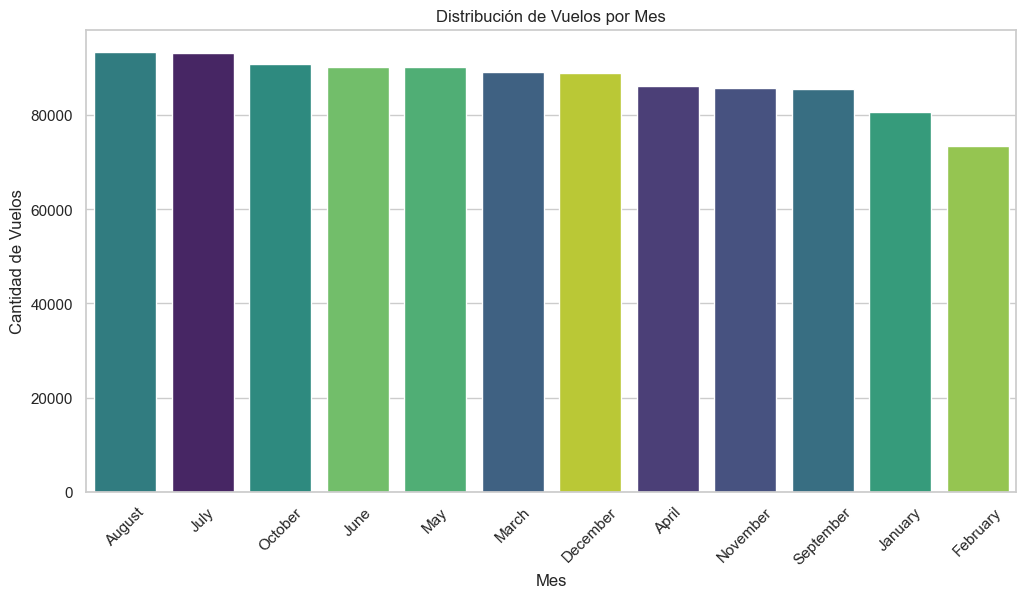

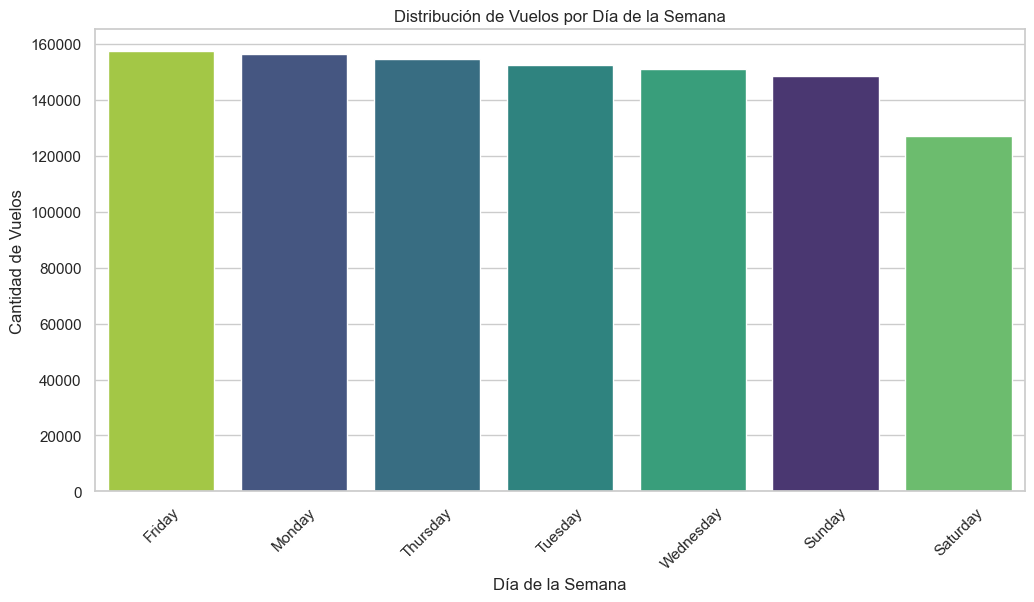

In [30]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.countplot(x='month', data=flights, order=flights['month'].value_counts().index, hue='month', palette='viridis', legend=False)
plt.title('Distribución de Vuelos por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Vuelos')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='day_of_week', data=flights, order=flights['day_of_week'].value_counts().index, hue='day_of_week', palette='viridis', legend=False)
plt.title('Distribución de Vuelos por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad de Vuelos')
plt.xticks(rotation=45)
plt.show()


Estos gráficos muestran la distribución de vuelos a lo largo de los días de la semana y los meses.
Los días con mayor tráfico aéreo pueden indicar picos en la demanda de vuelos. Esto es útil para optimizar el personal y otros recursos logísticos en aeropuertos. Los días con menos vuelos podrían aprovecharse para el mantenimiento y otras actividades que requieren menor interferencia.

Podemos ver que el mes de agosto y el dia viernes son los que presentan una mayor salida de vuelos 

##### Miramos si hay tendencias a lo largo del año en cuanto al número de vuelos o retrasos.

/var/folders/q1/5dh64yhx1c70xmzjkwz67x780000gn/T/ipykernel_3689/3187736644.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='month', y='dep_del15', data=flights, estimator=lambda x: sum(x)/len(x), marker='o', palette='viridis')


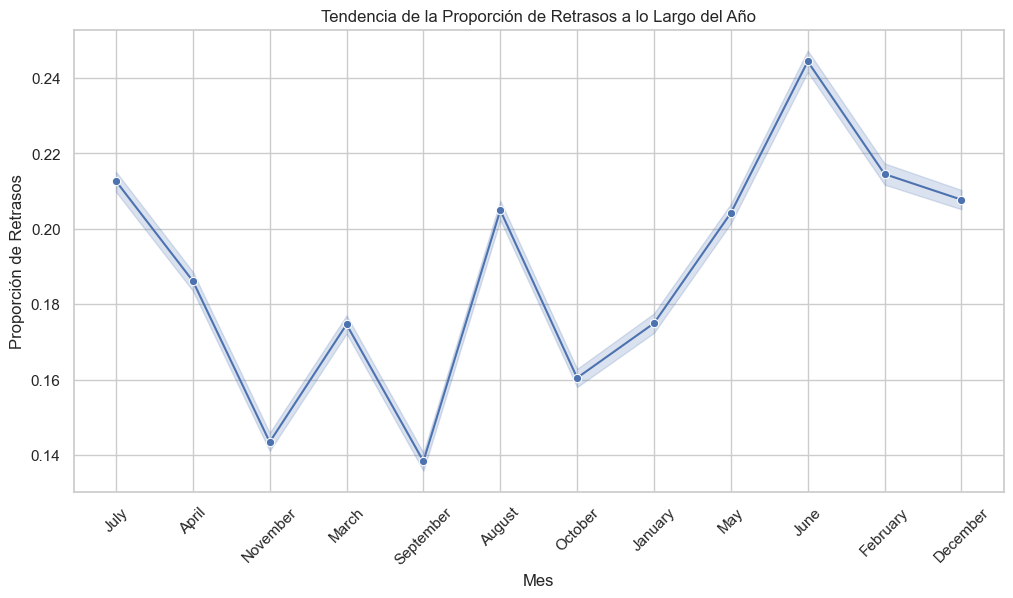

In [31]:
monthly_flight_counts = flights['month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='dep_del15', data=flights, estimator=lambda x: sum(x)/len(x), marker='o', palette='viridis')
plt.title('Tendencia de la Proporción de Retrasos a lo Largo del Año')
plt.xlabel('Mes')
plt.ylabel('Proporción de Retrasos')
plt.xticks(rotation=45)
plt.show()

La mayor proporción de retrasos en los vuelos se observa en el mes de junio, alcanzando un 24%.

##### Miramos la cantidad de vuelos por bloque de salida 

/var/folders/q1/5dh64yhx1c70xmzjkwz67x780000gn/T/ipykernel_3689/135244123.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='dep_time_blk', data=flights, order=flights['dep_time_blk'].value_counts().index, palette='viridis')


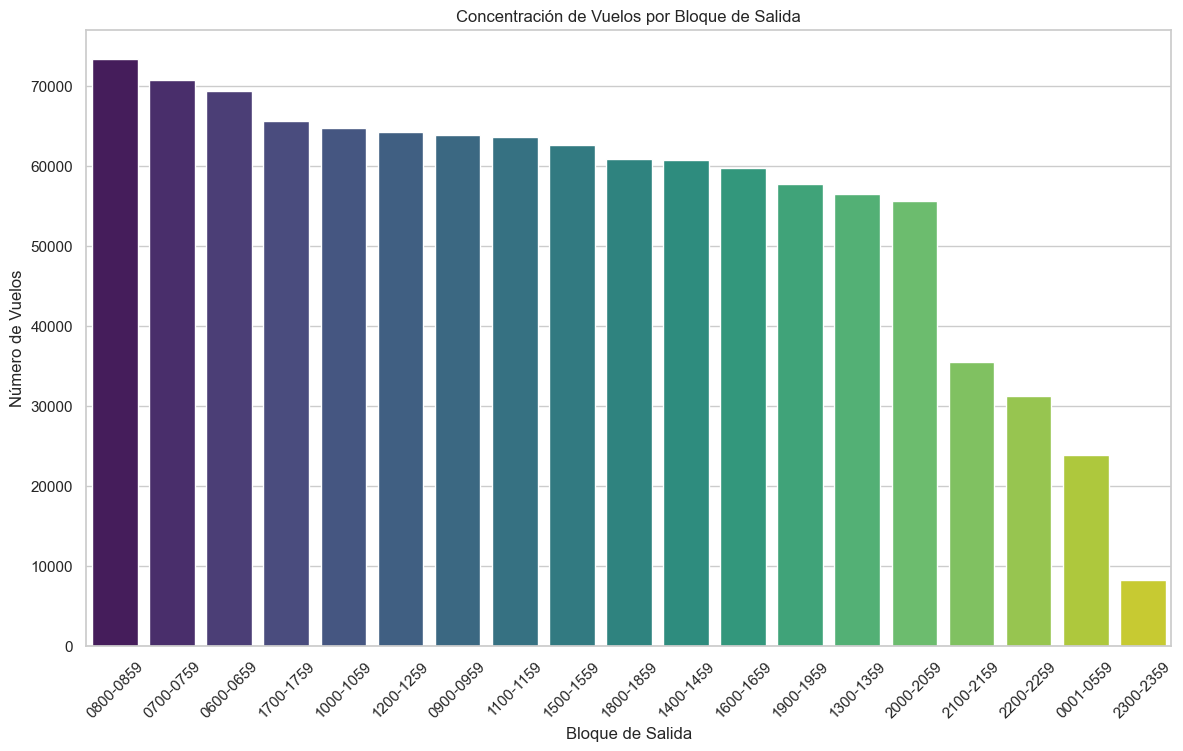

In [32]:
plt.figure(figsize=(14, 8))  
sns.countplot(x='dep_time_blk', data=flights, order=flights['dep_time_blk'].value_counts().index, palette='viridis')
plt.title('Concentración de Vuelos por Bloque de Salida')
plt.xlabel('Bloque de Salida')
plt.ylabel('Número de Vuelos')
plt.xticks(rotation=45)  
plt.show()

Este gráfico muestra la distribución de los vuelos a lo largo del día, agrupados por intervalos de tiempo que son los bloques por hora, y 
se puede identificar las horas pico en las que se programan más vuelos, lo cual es crucial para la planificación de recursos en los aeropuertos y para las aerolíneas. Los períodos con menor actividad también pueden indicar oportunidades para optimizar operaciones o manejar la demanda de manera más eficiente.

Vemos que el rango de horas en donde sale un mayor numero de vuelos es entre las 08:00 horas hasta las 08:59 horas 

/var/folders/q1/5dh64yhx1c70xmzjkwz67x780000gn/T/ipykernel_3689/3144071690.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delay_rate_by_block.index, y=delay_rate_by_block.values, palette='magma')


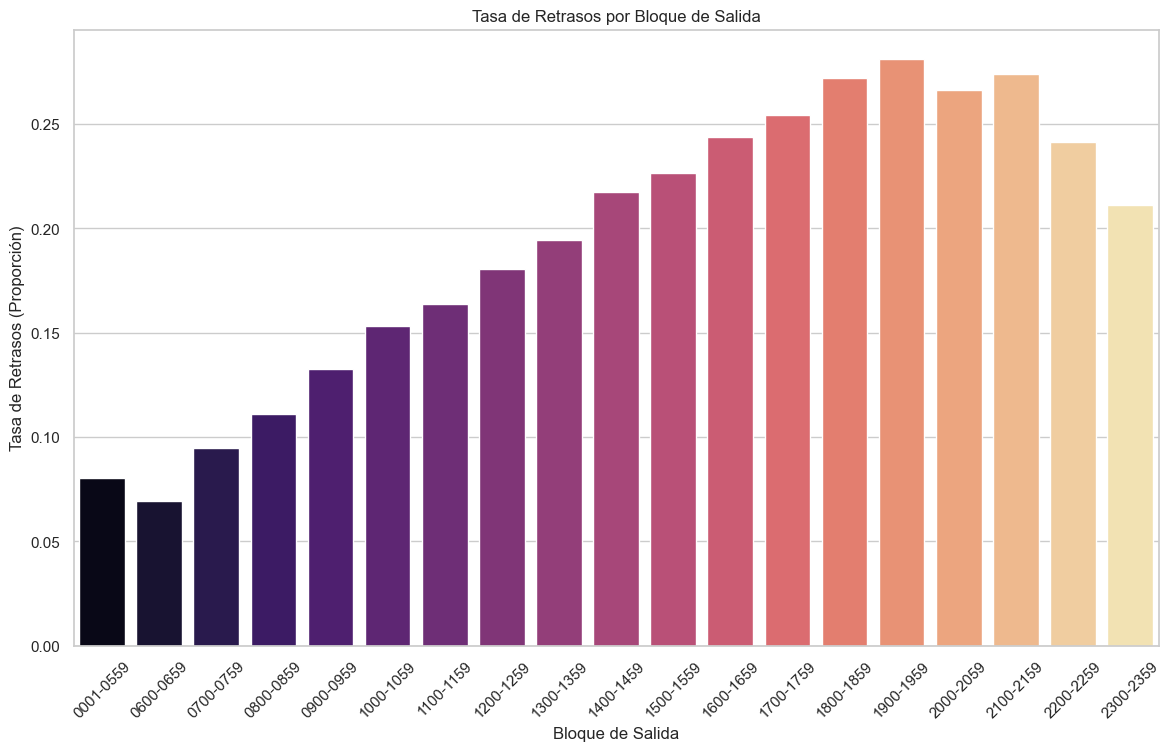

In [33]:
delay_rate_by_block = flights.groupby('dep_time_blk')['dep_del15'].mean()

plt.figure(figsize=(14, 8))  
sns.barplot(x=delay_rate_by_block.index, y=delay_rate_by_block.values, palette='magma')
plt.title('Tasa de Retrasos por Bloque de Salida')
plt.xlabel('Bloque de Salida')
plt.ylabel('Tasa de Retrasos (Proporción)')
plt.xticks(rotation=45) 
plt.show()

la mayor proporcion de retrasos que hay es en el rango entre las 19:00 y 19:59 horas con una tasa de aproximadamente el 25%

##### Usamos histogramas para ver cómo se distribuyen las variables meteorologicas

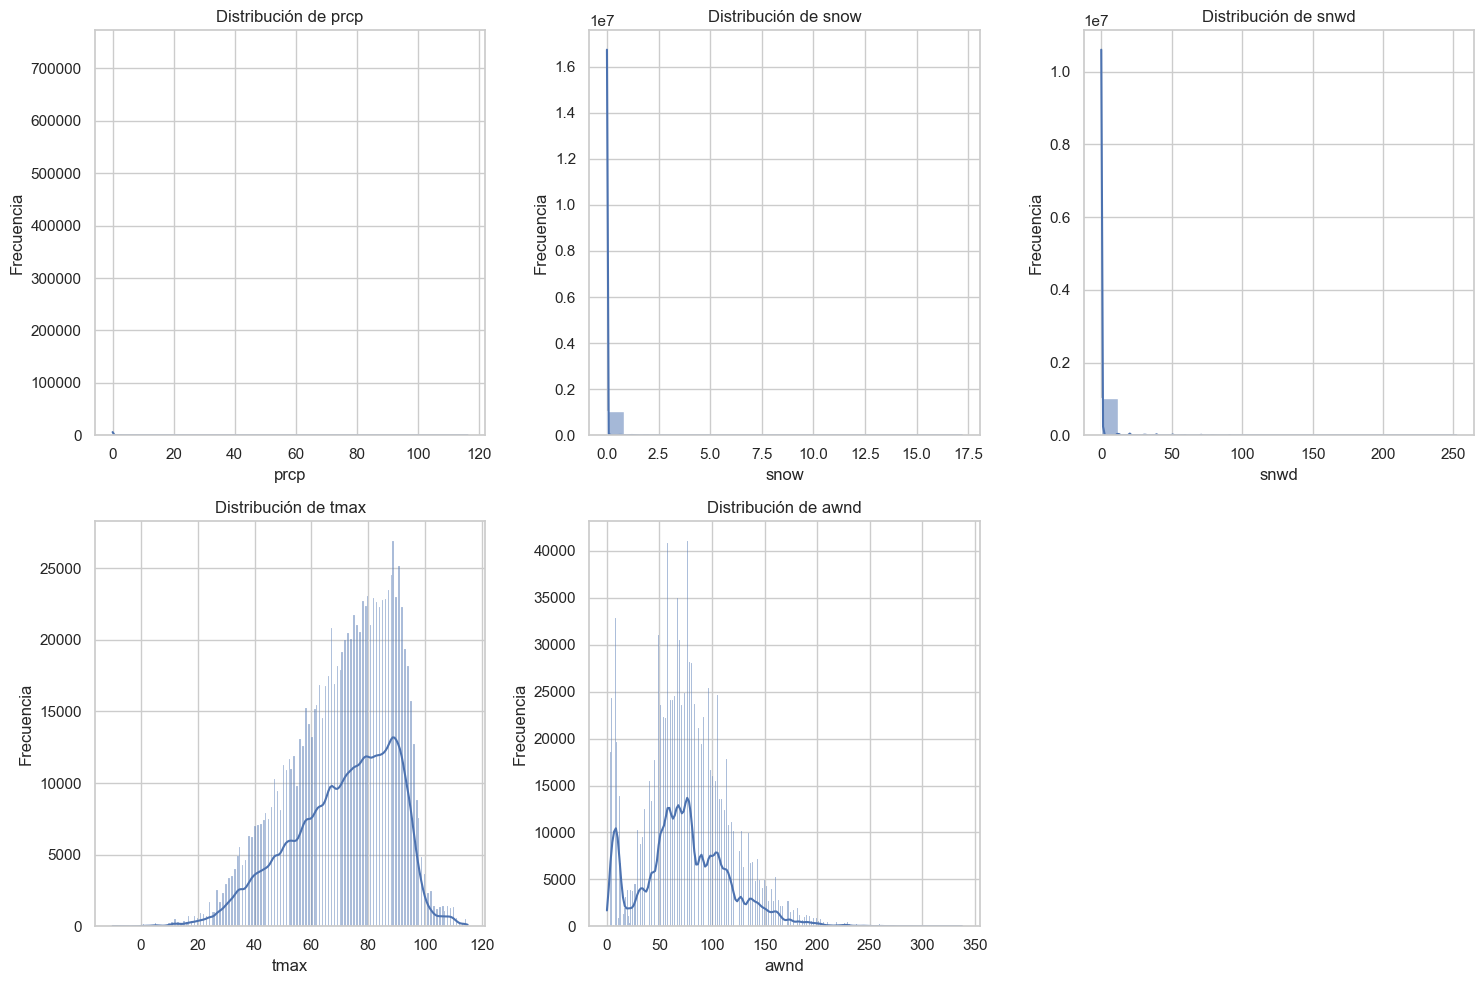

In [34]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(['prcp', 'snow', 'snwd', 'tmax', 'awnd'], 1):
    plt.subplot(2, 3, i)
    sns.histplot(flights[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

- prcp (precipitación): La mayoría de los valores se concentran en niveles bajos, con algunos casos extremos de alta precipitación.
- snow (nieve): La mayor parte de los datos muestra poca o ninguna nevada, con pocos casos de acumulación significativa.
- snwd (profundidad de la nieve): Similar a la variable de nieve, la mayoría de las observaciones registran poca o ninguna acumulación de nieve.
- tmax (temperatura máxima): Esta variable presenta una distribución aproximadamente normal, con un pico alrededor de los 70-80 grados 
- awnd (velocidad del viento): La velocidad del viento muestra una distribución sesgada a la derecha, con la mayoría de los valores en rangos bajos a  moderados, pero con una cola larga hacia velocidades de viento más altas.

#### Resumen y Conclusiones:

- En resumen podemos rescatar información importante y relevante en el dataset, como su numero de columnas, peso, tipos de columnas entre otros. 

- Se realizo una limpieza para revisar la calidad de los datos, si bien no se encontraron valores nulos o atípicos si se encontraron columnas duplicadas, y para las columnas que nos daban información meteorológica le cambiamos el formato numérico para que se pudieran leer esos datos con una mayor facilidad, también se eliminaron columnas que se vieron irrelevantes o que no aportaban una mayor información al momento de realizar un análisis o visualización de datos 

- Las visualizaciones nos permitieron identificar horas del día y días de la semana con mayor actividad, lo que es crucial para la optimización de recursos. se vio como se distribuyen estas variables meteorologicas, los rangos de hora en donde salen mas vuelos y en donde se retrasan mas, al igual que la tendencia de estos en los vuelos o retrasos.  

#### Dataset Transformado 

Finalmente vamos a exportar nuestro Dataframe ya limpio y con las comunas que vamos a usar, para luego realizar las vizualizaciones de datos, sin embargo primero vamos a eliminar otras columnas que no vamos a usar 

Eliminamos las columnas 

- latitude y longitude: Porque ya tenemos el nombre del aeropuerto (departing_airport), por lo que no vamos a necesitar las coordenadas geográficas(latitude, longitude) para el análisis. La ubicación geográfica se puede representar de manera más clara a través del nombre del aeropuerto.
- previous_airport: como no planeamos hacer análisis de vuelos consecutivos o cadenas de vuelos, esta columna podría no es crucial en el dataset.
- snwd (Snow Depth):porque ya tenemos columnas relacionadas con nieve (snow) y precipitación (prcp), la profundidad de la nieve (snwd) es redundante. 

In [35]:
flights = flights.drop(columns=['latitude', 'longitude', 'previous_airport', 'snwd'])

Comprobamos 

In [36]:
flights.columns

Index(['month', 'day_of_week', 'dep_del15', 'dep_time_blk', 'distance_group',
       'segment_number', 'concurrent_flights', 'number_of_seats',
       'carrier_name', 'airport_flights_month', 'airline_flights_month',
       'airline_airport_flights_month', 'avg_monthly_pass_airport',
       'avg_monthly_pass_airline', 'plane_age', 'departing_airport', 'prcp',
       'snow', 'tmax', 'awnd'],
      dtype='object')

Exportamos el dataset limpio 

In [37]:
import os

file_path = 'csv/flights_limpio2.csv'

if not os.path.exists(file_path):
    flights.to_csv(file_path, index=False)
    print(f"Archivo exportado a: {file_path}")
else:
    print(f"El archivo ya existe en la ruta: {file_path}")

El archivo ya existe en la ruta: csv/flights_limpio2.csv


En el notebook llamado tablas_datasets creamos la tabla en la Base de Datos, y en el notebook carga_datasets lo insertamos en esta tabla 

En el notebook llamado fligths_transformado_EDA donde le realisamos un E.D.A y un analisis a este dataset 

Con este dataset haremos las vizualisaciones de datos en PowerBI 